<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="250" height="250"><br>
</center>


 - (https://bit.ly/hg-6-1)
 - (https://bit.ly/hg-6-2)
 - (https://bit.ly/hg-6-3)
 
 
 
 # Chapter06. 비지도 학습 ( 비슷한 과일끼리 모으자!)
 
 - 학습목표
     - 타깃이 없는 데이터를 사용하는 비지도 학습과 대표적인 알고리즘을 소개한다.
     - 대표적인 군집 알고리즘인 k-평균과 DBSCAN을 배운다.
     - 대표적인 차원 축소 알고리즘인 주성분 분석(PCA)을 배운다.
     


## 06-3 주성분 분석

- 핵심키워드
    - 차원 축소
    - 주성분 분석
    - 설명된 분산
    - 차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인 PCA(주성분 분석) 모델을 만들어 보자.
    
    
### 차원과 차원 축소

지금까지 우리는 데이터가 가진 속성을 특성이라 불렀다. 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000 개의 특성이 있는 셈이다. 머신러닝에서는 이런 특성을 **차원dimension** 이라고도 부른다. 10,000개의 특성은 결국 10,000개의 차원이라는 건데 이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있을 것이다.

- 2차원 배열과 1차원 배열의 차원은 다른 건가?
    - 2차원 배열과 1차원 배열(벡터)에서 차원이란 용어는 조금 다르게 사용한다. 다차원 배열에서 차원은 배열의 축 개수가 된다. 가령 2차원 배열일 때는 행과 열이 차원이 된다. 하지만 1차원 배열, 즉 벡터일 경우에는 원소의 개수를 말한다. 이 절에서는 혼돈을 피하고자 가능하면 차원 대신 특성을 사용한다. 하지만 차원이랑 단어를 완전히 배제하기는 어렵다. 이 책이나 다른 책을 볼 때 참고하자.


이를 위해 비지도 학습 작업 중 하나인 **차원 축소 dimensionality reduction** 알고리즘을 다루어 보겠다. 3장에서 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다는 것을 배웠다. 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

또한 줄어든 차원에서 다시 원본 차원(예를 들어 과일 사진의 경우 10,000개의 차원)으로 손실을 최대한 줄이면서 복원할 수도 있다. 이 절에서는 대표적인 차원 축소 알고리즘인 **주성분 분석 principal component analysis** 을 배우겠다. 주성분 분석을 간단히 **PCA** 라고도 부른다.

### 주성분 분석 소개

주성분 분석 PCA 은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해 할 수 있다. 주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다는 점을 기억하자.

### PCA 클래스

이전 절과 마찬가리조 과일 사진 데이터를 다운로드하여 넘파이 배열로 적재하겠다.

In [88]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
    
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1, 100*100)

--2021-05-29 11:15:59--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-05-29 11:16:00--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.78.231.108
Connecting to github.com (github.com)|52.78.231.108|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-05-29 11:16:00--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... con

사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공한다. PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 한다. k-평균과 마찬가지로 비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공하지 않는다.

In [90]:
from sklearn.decomposition import PCA
pca= PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

간단하다. PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다. 이 배열의 크기를 확인하겠다.

In [91]:
print(pca.components_.shape)

(50, 10000)


n_components=50 으로 지정했기 때문에 pca.components_배열의 첫 번째 차원이 50이다. 즉 50개의 주성분으 찾는 거다. 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000이다.

원본 데이터와 차원이 같으므로 주성분을 100 x 100 크기의 이미지처럼 출력해 볼 수 있다. 2절에서 사용했던 draw_fruits() 함수를 사용해서 이 주성분을 그림으로 그려보자. 이 함수의 실제 코드는 2절을 참고하자.

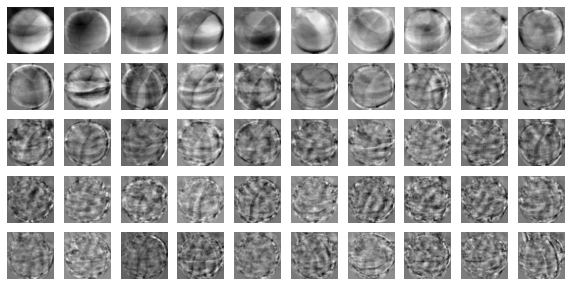

In [92]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다. 한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다.

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다. 이는 마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있다. PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄여 보자.

In [93]:
print(fruits_2d.shape)

(300, 10000)


In [94]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


fruits_2d 는 (300, 10000)의 크기의 배열이었다. 10,000개의 픽셀(특성)을 가진 300개의 이미지이다. 50개의 주성분을 찾은 PCA모델을 사용해 이를 (300,50) 크기의 배열로 변환했다. 이제 fruits_pca 배열은 50개의 특성을 가진 데이터이다.

데이터를 성공적으로 줄였다. 무려 1/200로 줄어들었다. fruits_2d 대신 fruits_pca를 저장한다면 훨씬 공간을 줄일 수 있다. 데이터의 차원을 줄였다면 다시 원상 복구할 수도 있을까?


### 원본 데이터 재구성

앞에서 10,000개의 특성을 50개로 줄였다. 이로 인해 어느 정도 손실이 발생할 수밖에 없다. 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.

PCA 클래스는 이를 위해 inverse_transform() 메서드를 제공한다. 앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10,000개의 특성을 복원하겠다.

In [95]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


예상대로 10,000개의 특성이 복원 되었다. 이 데이터를 100 x 100 크기로 바꾸어 100개씩 나누어 출력하겠다. 이 데이터는 순서대로 사과, 파인애플, 바나나를 100개씩 담고 있다.

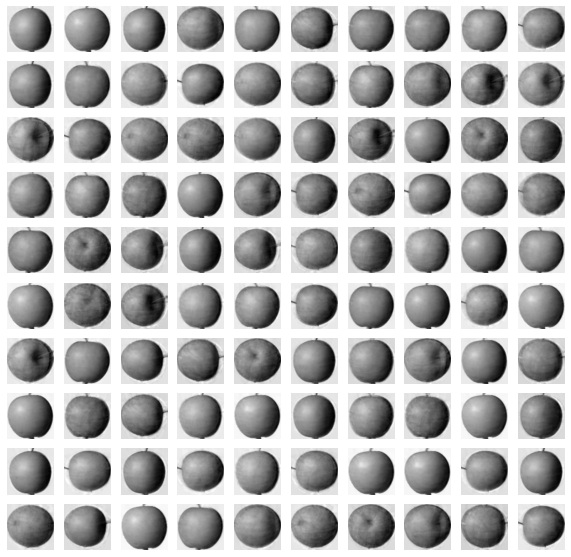

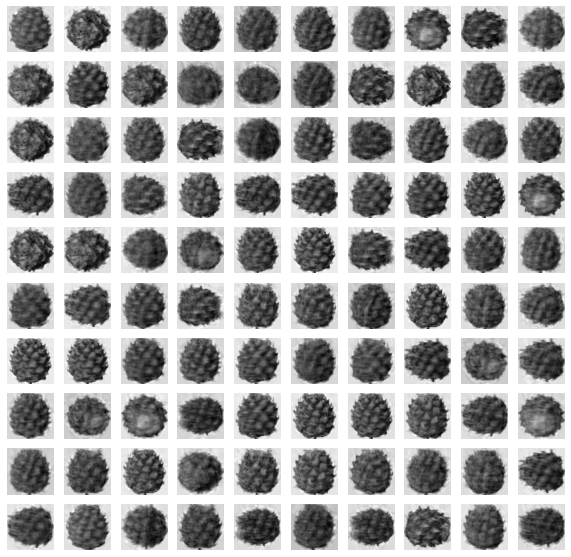

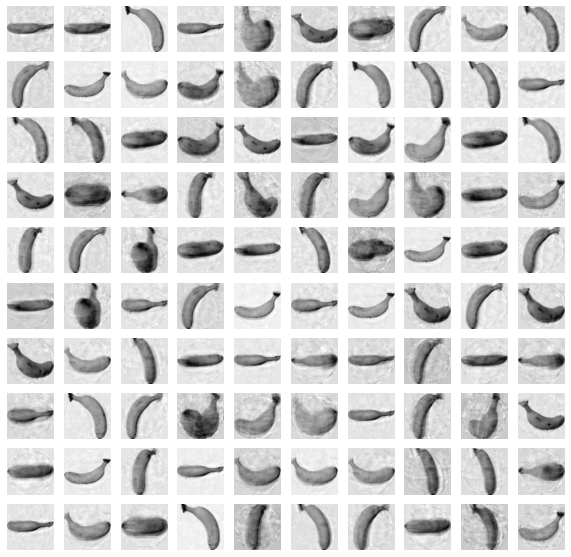

In [96]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

와우! 거의 모든 과일이 잘 복원 되었다. 일부 흐리고 번진 부분이 있지만 불과 50개의 특성을 10,000개로 늘린 것을 감안한다면 놀라운 일이다. 이 40개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문이다.

만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다. 그럼 50개의 특성을 얼마나 분산을 보존하고 있는 것일까?
다음을 통해 알아보자.


### 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산 explained variance** 이라고 한다. PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다. 당연히 첫 번째 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

- 설명된 분산은 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값이다.



In [97]:
print(np.sum(pca.explained_variance_ratio_))

0.9215574271239145


92%가 넘는 분산을 유지하고 있다. 앞에서 50개의 특성에서 원본 데이터를 복원했을 때 원본 이미지의 품질이 높았던 이유를 여기에서 찾을 수 있다. 설명된 분산의 비율을 그래프로 그려 보면 적절한 주성분의 개수를 찾는데 도움이 된다. 맷플롯립의 plot() 함수로 설명된 분산을 그래프로 출력해 보자.

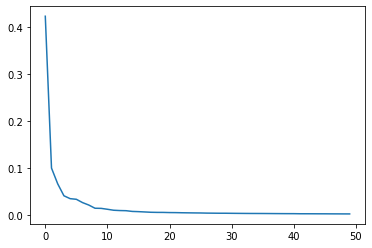

In [99]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있다. 그 다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작다. 이번에는 PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델을 훈련하겠다. 원본 데이터를 사용했을 때와 어떤 차이가 있는지 확인해 보자.

### 다른 알고리즘과 함께 사용하기

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아보자. 3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용하겠다. 저 사이킷런의 LogisticRegression 모델을 만든다.

In [100]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

지도 학습 모델을 사용하려면 타깃값이 있어야 한다. 여기에서는 사과를 0, 파인애플을 1, 바나나를 2로 지정했다. 파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복한다. 이를 이용하면 100개의 0, 100개의 1, 100개의 2로 이루어진 타깃 데이터를 손쉽게 만들 수 있다.

In [101]:
target = np.array([0]*100 + [1]*100 + [2]*100)

먼저 원본 데이터인 fruits_2d를 사용해 보자. 로지스틱 회귀 모델에서 성능을 가늠해 보기 위해 cross_validate()로 교차 검증을 수행한다.

In [103]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.9130433082580567


교차 검증의 점수는 0.997 정도로 매우 높다. 특성이 10,000개나 되기 때문에 300개의 샘플에서는 금방 과대적합된 모델을 만들기 쉽다. cross_validate() 함수가 반환하는 딕셔너리에는 fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록되어 있다. 0.94초 정도 걸렸다. 이 값을 PCA로 축소한 fruits_pca를 사용했을 때와 비교하겠다.

In [104]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03347268104553223


50개의 특성만 사용했는데도 정확도가 100$이고 훈련 시간은 0.03초로 20배이상 감소했다. PCA로 훈련 데이터의 차원을 축소하면 저장 공간 뿐만아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.

앞서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정했다. 이 대신 원하는 설명된 분산의 비율을 입력할 수도 있다. PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다. 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어 보자.

In [105]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

간단하다. 주성분 개수 대신 0 ~ 1 사이의 비율을 실수로 입력하면 된다. 몇 개의 주선분을 찾았는지 확인해 보자.

In [106]:
print(pca.n_components_)

2


단 2개다. 2개의 특서만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다.

이 모델로 원본 데이터를 변환하겠다. 주성분이 2개이므로 변환된 데이터의 크기는 (300,2)가 될 것이다.

In [107]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


2개의 특성만 사용하고도 교차 검증의 결과가 좋을까? 한번 확인해보자

In [108]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

0.9933333333333334
0.05203094482421875


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


와! 정말 놀랍다. 2개의 특성을 사용했을 뿐인데 정확도가 99%의 정확도를 달성했다.

이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보겠다.

In [109]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


fruits_pca 로 찾은 클러스터는 각각 91개 , 99개, 110개의 샘플을 포함하고 있다. 이는 2절에서 원본 데이터를 사용해을 때와 거의 비슷한 결과이다. KMeans가 찾은 레이블을 사용해 과일 이미지를 출력해 보자.

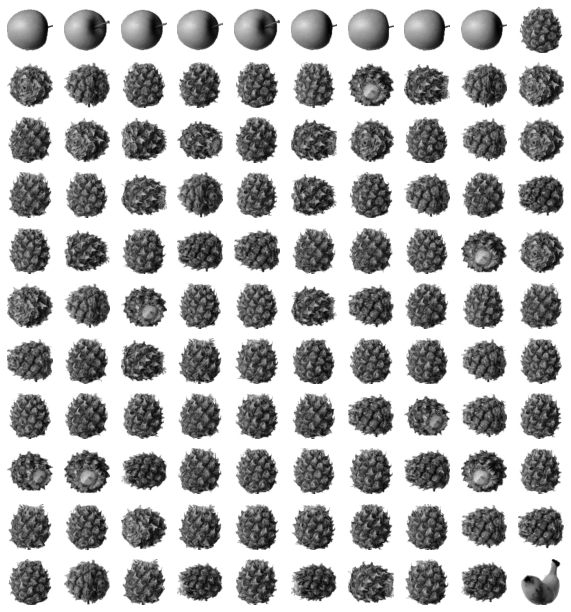

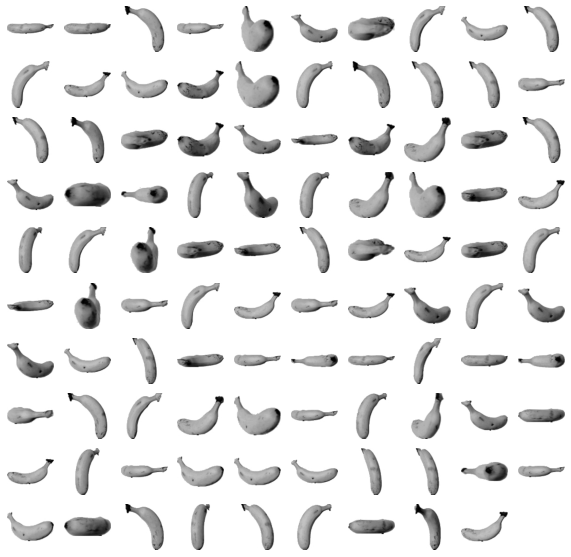

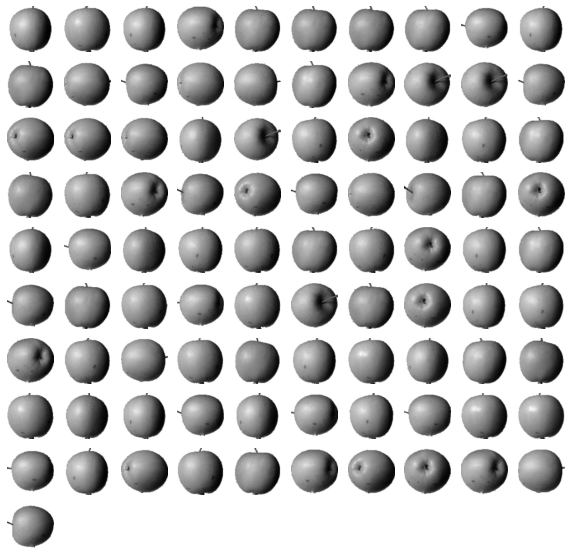

In [110]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

2절에서 찾은 클러스터와 비슷하게 파인애플은 사과와 조금 혼돈되는 면이 있다. 몇 개의 사과가 파인애플 클러스터에 섞여 들어가 있다.

훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화이다. 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다. fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현 할 수 있다. 앞에서 찾은 km.labels_를 사용해 클러스터별로 나누어 산점도를 그려보자.

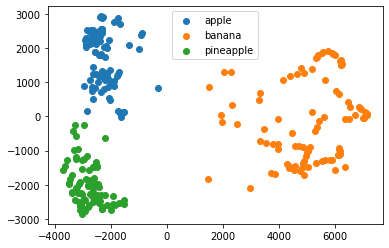

In [111]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
    
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

각 클러스터의 산점도가 아주 잘 구분된다. 2개의 특성만을 사용했는데 로지스틱 회귀 모델의 교차 검증 점수가 99%에 달하는 이유를 이제 알 것 같다.

이 그림을 보면 사과와 파인애플 클러스터의 경계가 가깝게 붙어 있다. 이 두 클러스터의 샘플은 몇 개가 혼동을 일으키기 쉬울 것 같다. 데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있다. 그런 면에서 차원 축소는 매우 유용한 도구 중 하나이다.


### 주성분 분석으로 차원 축소 - 문제해결 과정


이 절에서는 대표적인 비지도 학습 문제 중 하나인 차원 축소에 대해 알아본다. 차원 축소를 사용하면 데이터셋의 크기를 줄일 수 있고 비교적 시각화 하기 쉽다. 또 차원 축소된 데이터를 지도 학습 알고리즘이나 다른 비지도 학습 알고리즘에 재사용하여 성능을 높이거나 훈련 속도를 빠르게 만들 수 있다.

사이킷런의 PCA 클래스를 사용해 과일 사진 데이터의 특성을 50개로 크게 줄었다. 특성 개수는 작지만 변환된 데이터는 원본 데이터에 있는 분산이 90% 이상을 표현한다. 이를 설명된 분산이라 부른다.

PCA 클래스는 자동으로 설명된 분산을 계산하여 제공해 준다. 또한 주성분의 개수를 명시적으로 지정하는 대신 설명된 분산의 비율을 설정하여 원하는 비율만큼 주성분을 찾을 수 있다.

PCA 클래스는 변환된 데이터에서 원본 데이터를 복원하는 메서드도 제공한다. 변환된 데이터가 원본 데이터의 분산을 모두 유지하고 있지 않다면 완벽하게 복원되지 않는다. 하지만 적은 특성으로 상당 부분의 디테일을 복원 할 수 있다.


지금까지 머신러닝의 주요 알고리즘을 살펴 보았다. 다음 장에서는 최근 머신러닝 분야에서 가장 인기 있는 주제인 딥러닝에 대해 배워보겠다.

> 전체 소스 코드


- https://bit.ly//hg-6-3 에 접속하면 코랩에서 이절의 코드를 바로 열어 볼 수 있다.

- 출처: 혼자 공부하는 머신러닝 + 딥러닝